Usando la generación de puntos sobre una esfera estime la siguiente integral, para $\left \{x^2 + y^2 + z^2 ≤ 1\right \}$:
$$\int \int \int e^{\sqrt{x^{2}+y^{2}+z^{2}}}dxdydz=4\pi(e-2)$$

In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [46]:
def CreateCircle(N,R):
    X = np.zeros(N)
    Y = np.zeros_like(X)
    Z = np.zeros_like(X)
    
    for i in tqdm(range(N)):
        
        u = np.random.rand()
        r = R*u**(1/3)
        
        theta = np.random.uniform(0,2*np.pi)
        phi= np.random.uniform(0,np.pi)
        
        X[i] = r*np.sin(phi)*np.cos(theta)
        Y[i] = r*np.sin(phi)*np.sin(theta)
        Z[i] = r*np.cos(phi)
        
    return X,Y,Z

In [47]:
X,Y,Z = CreateCircle( int(1e4), 1)

100%|██████████| 10000/10000 [00:00<00:00, 63266.13it/s]


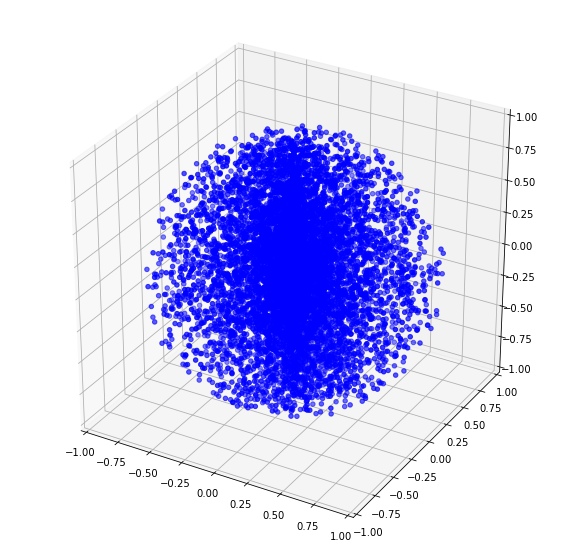

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection = '3d')

#configurar límites de los ejes
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.scatter(X,Y,Z,color='b')

In [143]:
def func(ro,phi):
    return (ro**2)*(np.sin(phi))*(np.exp(ro))

In [150]:
def GetPoints(phi_max,phi_min,R,N):
    
    r=np.random.uniform(0,R,N) 
    ph = np.random.uniform(0,np.pi,N)
    
    return r,ph

In [151]:
r,phi=GetPoints(np.pi,0,1,int(1e6))

In [152]:
a=0
b=1

c=0
d=np.pi

e=0
f=2*np.pi

Recordando que: $$\int_a^b\int_c^d\int_e^f f(\rho,\phi,\theta)d\theta d\rho d\phi=(b-a)(d-c)(f-e)\bar{f}$$
Siendo $\bar{f}$ el promedio de los puntos en la esfera parametrizada

In [153]:
mean=np.mean(func(r,phi))
I = mean*(b-a)*(d-c)*(f-e)

In [154]:
I

9.018013818466056

In [155]:
Integral=4*np.pi*(np.exp(1)-2)
Integral

9.02619566197592